## ESERCIZIO:
Genera dei dati usando make_blobs(n_samples=100, centers=2, random_state=6, cluster_std = 2, n_features = 2):
fai il training del SVC usando un kernel rbf e scegliendo gamma = [1, 10, 100] e C = 1


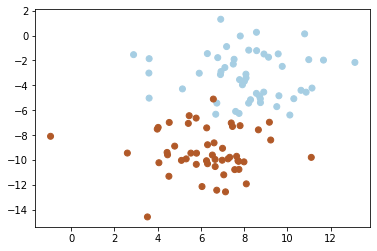

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
    
#Creazione di 100 punti divisi in due classi
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std = 2, n_features = 2)

plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Paired)

In [9]:
def plot_svc(clf,X,y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Otteniamo gli estremi dei due assi:
    ax = plt.gca() #Get axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Griglia di punti
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Fai il plot dei punti che hanno decision_function = -1, 0, 1
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    
    print(cross_val_score(clf, X, y, cv = 3, scoring = "accuracy"))

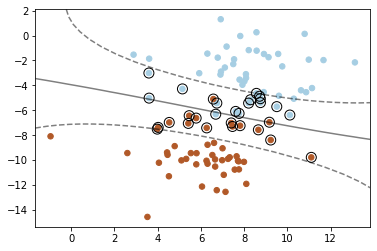

[0.97058824 0.96969697 0.93939394]


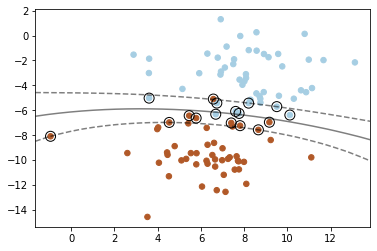

[0.97058824 0.93939394 0.93939394]


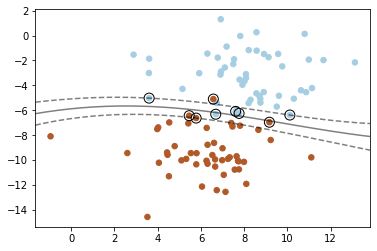

[0.97058824 1.         0.96969697]


In [11]:
c = [1, 10, 100]

for ci in c:
    clf = SVC(C = ci)
    clf.fit(X,y)
    plot_svc(clf,X,y)
    